In [3]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --------------------------------------- 626.3/626.3 kB 19.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from textblob import TextBlob
import matplotlib.pyplot as plt


In [5]:

# Load the dataset
# The dataset should have columns: 'comment', 'date', and 'failure_flag' (1 for failure, 0 otherwise)
data_path = "comments.csv"  # Replace with your file path
data = pd.read_csv(data_path)


In [6]:

# Display first few rows of data
print("Sample Data:")
print(data.head())


Sample Data:
                              comment        date  failure_flag
0  System crash occurred during test.  2024-11-01             1
1     Everything is running smoothly.  2024-11-02             0
2             Error 404 on page load.  2024-11-03             1
3             Performance seems fine.  2024-11-04             0
4        Memory usage spike detected.  2024-11-05             1


In [7]:

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])


In [8]:

# Sentiment Analysis
print("Performing Sentiment Analysis...")
data['sentiment'] = data['comment'].apply(lambda x: TextBlob(x).sentiment.polarity)


Performing Sentiment Analysis...


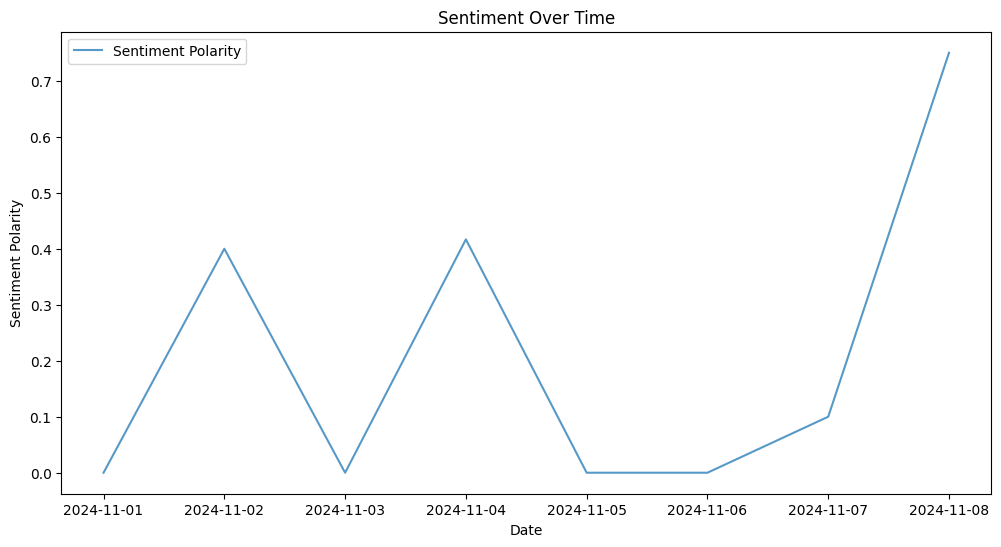

In [9]:

# Visualizing sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['sentiment'], label='Sentiment Polarity', alpha=0.75)
plt.title("Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment Polarity")
plt.legend()
plt.show()


In [10]:

# TF-IDF Vectorization
print("Performing TF-IDF Vectorization...")
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(data['comment']).toarray()


Performing TF-IDF Vectorization...


In [11]:

# Combine TF-IDF features with sentiment
print("Combining Features...")
X = np.hstack((X_tfidf, data['sentiment'].values.reshape(-1, 1)))
y = data['failure_flag']


Combining Features...


In [12]:

# Split data into training and testing sets
print("Splitting Data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Splitting Data...


In [13]:

# Train the Random Forest Classifier
print("Training Model...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


Training Model...


RandomForestClassifier(random_state=42)

In [14]:

# Test the model
print("Testing Model...")
y_pred = model.predict(X_test)


Testing Model...


In [15]:

# Evaluate the model
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



c:\Users\adity\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adity\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adity\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adi

Visualizing Feature Importance...


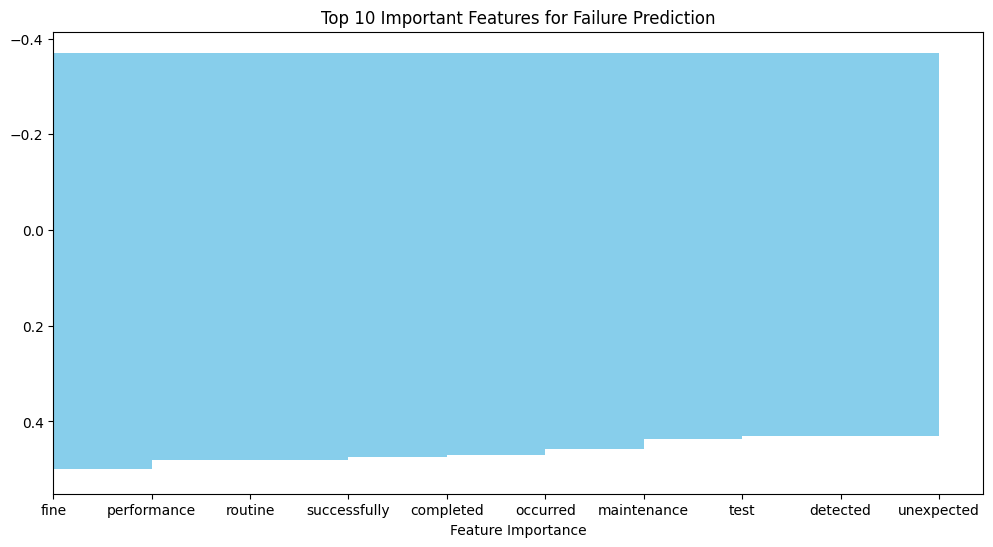

In [16]:

# Visualizing Feature Importance
print("Visualizing Feature Importance...")
feature_importances = model.feature_importances_
important_features = sorted(
    zip(feature_importances, vectorizer.get_feature_names_out()), reverse=True
)[:10]
labels, values = zip(*important_features)

plt.figure(figsize=(12, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features for Failure Prediction")
plt.gca().invert_yaxis()
plt.show()


In [17]:

# Predict future failures
print("Predicting Future Failures...")
future_comments = ["The system is slow and unresponsive.", "Everything is working fine."]
future_sentiments = [TextBlob(comment).sentiment.polarity for comment in future_comments]
future_tfidf = vectorizer.transform(future_comments).toarray()
future_features = np.hstack((future_tfidf, np.array(future_sentiments).reshape(-1, 1)))
future_predictions = model.predict(future_features)

for comment, pred in zip(future_comments, future_predictions):
    print(f"Comment: '{comment}' - Predicted Failure: {bool(pred)}")


Predicting Future Failures...
Comment: 'The system is slow and unresponsive.' - Predicted Failure: True
Comment: 'Everything is working fine.' - Predicted Failure: False
